<a href="https://colab.research.google.com/github/puneet-panwar/All_about_LSTMs/blob/main/roll_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/puneet-panwar/All_about_LSTMs

Cloning into 'All_about_LSTMs'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 55 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import math

In [12]:
%pwd
%ls
%cd All_about_LSTMs

All_about_LSTMs/  data/  README.md  roll_modeling.ipynb
/content/All_about_LSTMs/All_about_LSTMs


In [13]:
## reading data
# reader = csv.reader(open("data/roll_02_05_2022.txt"), delimiter="\t") # '\t' for tab and '\s' for space delimited files
df = pd.read_csv('data/roll_02_05_2022_new.txt', delimiter=r"\s+") # df--> data frame
#df = pd.read_csv('data/roll_02_05_2022.txt') # df--> data frame

"""
result = df.head(10)
print("First 10 rows of the DataFrame:")
print(result)
df.shape 
"""

'\nresult = df.head(10)\nprint("First 10 rows of the DataFrame:")\nprint(result)\ndf.shape \n'

In [14]:
df.shape

(4878, 9)

In [15]:
df.head()

,Time(Sec),X_ref_pos(i),X_enc_pos(i),X_pos_err(i),X_vel_ff(f),X_vel_fbf(f),X_ref_acc(f),X_command(f),X_curr_abs(f)
0,0.00000,120000,120001,-1,0.0,-841.4660,0.0,5.44362,0.032742
1,0.00625,120000,120001,-1,0.0,-380.1570,0.0,5.38166,0.048310
2,0.01250,120000,120001,-1,0.0,-1380.4900,0.0,5.52079,0.041377
3,0.01875,120000,120002,-2,0.0,-11.3194,0.0,5.31762,0.051183
4,0.02500,120000,120001,-1,0.0,599.3670,0.0,5.24705,0.065039


In [16]:
## Motor parameters:

torque_const = 3.9 # Nm/A_rms
# motor has incremental encoder with a resolution of 4320000 counts/rev --> 360 deg  = 4320000 counts
c2d = 360/4320000 # counts to degs conversion factor
peak_torque = 39.6 # peak torque within 1 sec in Nm
peak_current = 10.2 # peak current within 1 sec in Arms
# conversion to arc sec
res_arcsec = c2d*3600 # resolution of motor in arc sec
req_res = 30 # in arcsec
betterment_factor = req_res/res_arcsec
print("the rescolution of encoder is %.4f arcsec against the required res. of 30 arcsec. Which means available res. is %.4f times better than the required res." %(res_arcsec, betterment_factor))

the rescolution of encoder is 0.3000 arcsec against the required res. of 30 arcsec. Which means available res. is 100.0000 times better than the required res.


In [27]:
## assign variables:

N, variables = df.shape #N = number of samples

time = df.iloc[:,0]

ref_pos = c2d*df.iloc[:,1] #in deg

feedback_pos = c2d*df.iloc[:,2] # encoder feedback in deg

err_pos = c2d*df.iloc[:,3]

ref_vel = c2d*df.iloc[:,4] #in deg/s

feedback_vel = c2d*df.iloc[:,5] #in deg/s

ref_acc = c2d*df.iloc[:,6] # deg/s^2

command_current = df.iloc[:, 7] #command current in A

actual_current = df.iloc[:,8]  #actual current in A

# finding rms value for command and actual current
I_command_rms = math.sqrt((1/N)*sum(command_current**2))
I_actual_rms = math.sqrt((1/N)*sum(actual_current**2))
print(I_command_rms)
print(I_actual_rms)

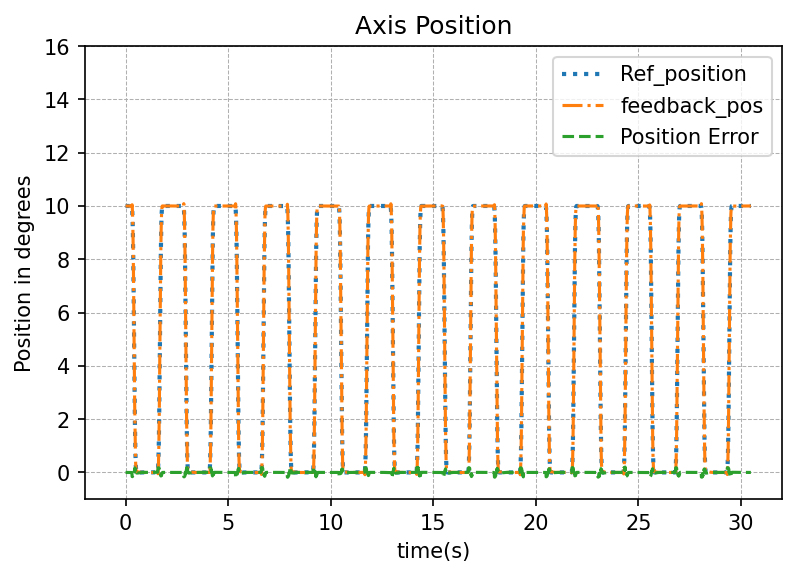

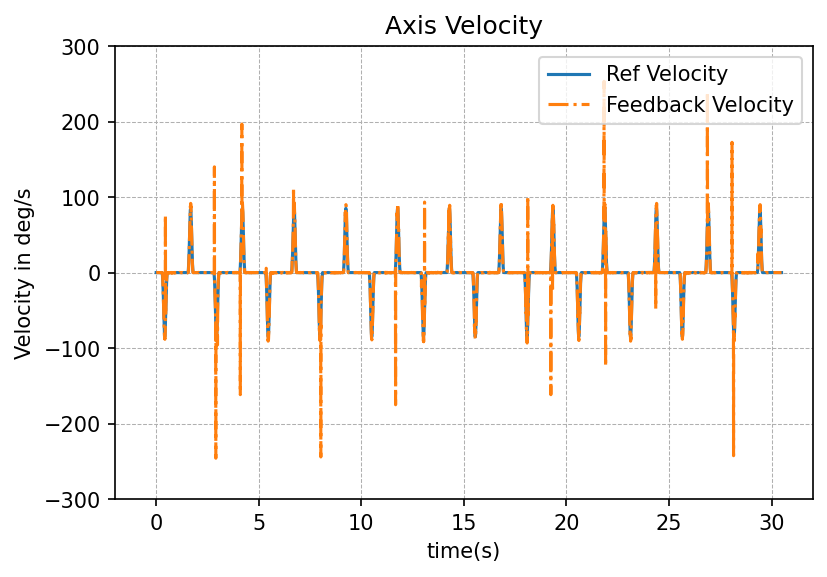

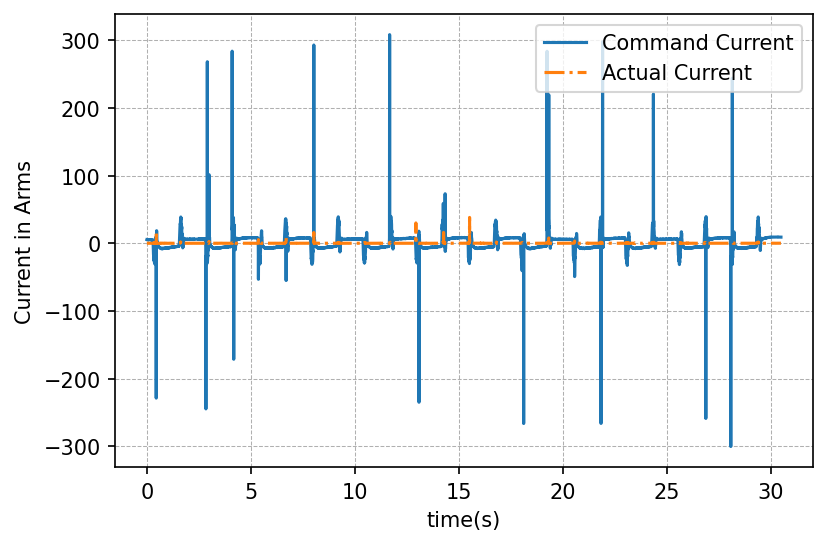

In [19]:
## plotting
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
# https://blakeaw.github.io/2020-05-25-improve-matplotlib-notebook-inline-res/

#plt.subplot(2,2,1)
# Position plots
plt.plot(time, ref_pos, linestyle=':', linewidth=2, label='Ref_position')
plt.plot(time, feedback_pos, linestyle='-.', label='feedback_pos')
plt.plot(time, err_pos, linestyle='--', label='Position Error')
plt.axis([-2, 32, -1, 16])
plt.title("Axis Position")
plt.xlabel('time(s)')
plt.ylabel('Position in degrees')
plt.legend()
plt.grid(linestyle = '--', linewidth = 0.5)
#plt.savefig('pos_plots.png', dpi=300) # use before plt.show()
plt.show()

# velocity plots
plt.plot(time, ref_vel, linestyle='-', label='Ref Velocity')
plt.plot(time, feedback_vel, linestyle='-.', label='Feedback Velocity')
plt.axis([-2, 32, -300, 300])
#plt.autoscale()
plt.title("Axis Velocity")
plt.xlabel('time(s)')
plt.ylabel('Velocity in deg/s')
plt.legend(loc='upper right') # https://www.geeksforgeeks.org/change-the-legend-position-in-matplotlib/
plt.grid(linestyle = '--', linewidth = 0.5)
#plt.savefig('vel_plots.png', dpi=300) # use before plt.show()
plt.show()

# current plots
plt.plot(time, command_current, linestyle='-', label='Command Current')
plt.plot(time, actual_current, linestyle='-.', label='Actual Current')
#plt.axis([-2, 32, -300, 300])
#plt.autoscale()
plt.title("")
plt.xlabel('time(s)')
plt.ylabel('Current in Arms')
plt.legend(loc='upper right') # https://www.geeksforgeeks.org/change-the-legend-position-in-matplotlib/
plt.grid(linestyle = '--', linewidth = 0.5)
#plt.savefig('current_plots.png', dpi=300) # use before plt.show()
plt.show()


In [20]:
max(command_current)

308.314

In [21]:
max(actual_current)

38.2125

In [22]:
max(ref_pos)

10.0

In [23]:
360*(120000/4320000)

10.0

In [24]:
c2d


8.333333333333333e-05

In [25]:
min(actual_current)

1.25e-05

**Understanding Control Loop Architecture:** 
- servo drive includes three servo loops, current loop, velocity loop and position loop, to control the motor. 
- In position mode, all loops are handled by the servo drive. 
- In velocity mode, velocity loop and current loop are handled by the servo drive. 
- In torque/force mode, only current loop is handled by the servo drive. Current loop receives voltage command from controller and controls motor commutation. 
- For easy operation, the servo loops of D1-N servo drive can be set and adjusted by one common gain (CG).
- servo drive uses one high-speed digital signal processor (DSP) to control motor. 
- Normally if servo loops are controlled via digital method, users need to adjust several servo gains. But for easy operation, servo drive provides one common gain (CG) for users to adjust all servo gains at the same time.

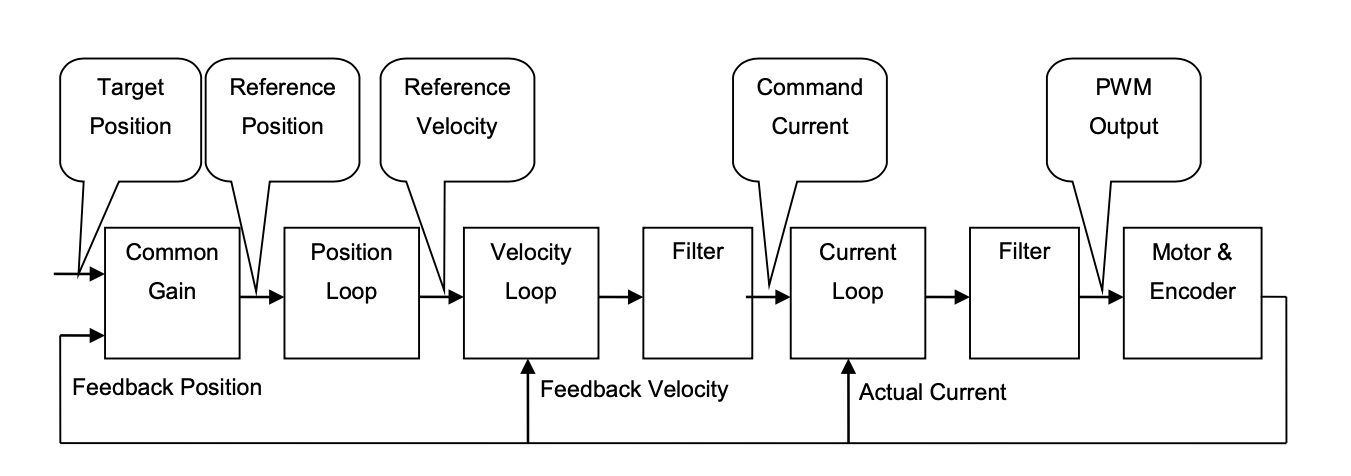